In [3]:
import MySQLdb
import matplotlib
#matplotlib.use('Agg')
#matplotlib.use ('template')
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import pylab as pl
import sys, getopt
import time
import os
import numpy as np
import cPickle

## Reglas transito : 99 (Aula Ambiental) - 140 (Puente Fundadores)

In [3]:
estA = 99 ; strA = 'Aula Ambiental (99)'
estB = 140 ; strB = 'Puente Fundadores (140)'

nivA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estA)+'.txt',dtype=float)
nivB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estB)+'.txt',dtype=float)
fecA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estA)+'.txt',dtype=str)
fecB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estB)+'.txt',dtype=str)

In [4]:
dateA = []
dateB = []

for fa in fecA:
    dateA.append(datetime.datetime(int(fa[0].split('-')[0]), int(fa[0].split('-')[1]), int(fa[0].split('-')[2]),
                                   int(fa[1].split(':')[0]), int(fa[1].split(':')[1])))
for fb in fecB:
    dateB.append(datetime.datetime(int(fb[0].split('-')[0]), int(fb[0].split('-')[1]), int(fb[0].split('-')[2]),
                                   int(fb[1].split(':')[0]), int(fb[1].split(':')[1])))

nivelA = [] ; nivelB = [] ; lag = []
    
for x in range(len(dateB)):
    fbb = dateB[x]
    
    for y in range(len(dateA)):
        faa = dateA[y]
        dif = str(fbb - faa).split(':')
        
        try:
            horas = int(dif[0])
            if horas <= 2:
                minutos = horas*60 + int(dif[1])
                nivelA.append(nivA[y])
                nivelB.append(nivB[x])
                lag.append(minutos)
        except:
            pass

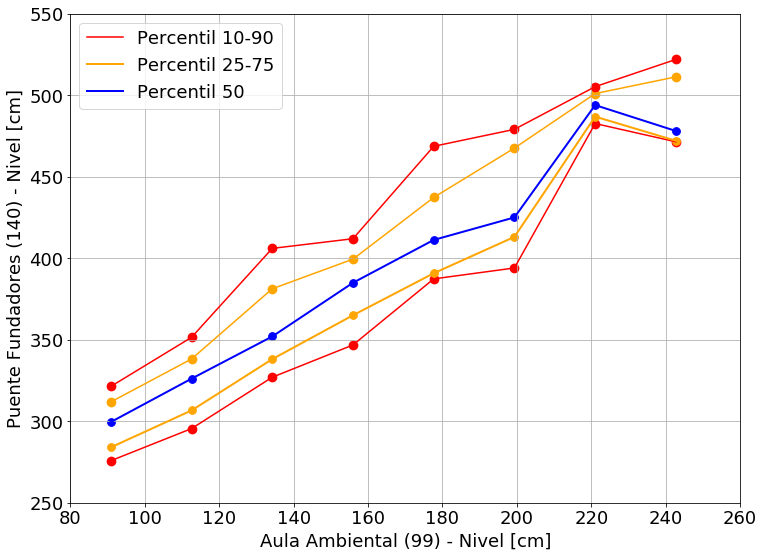

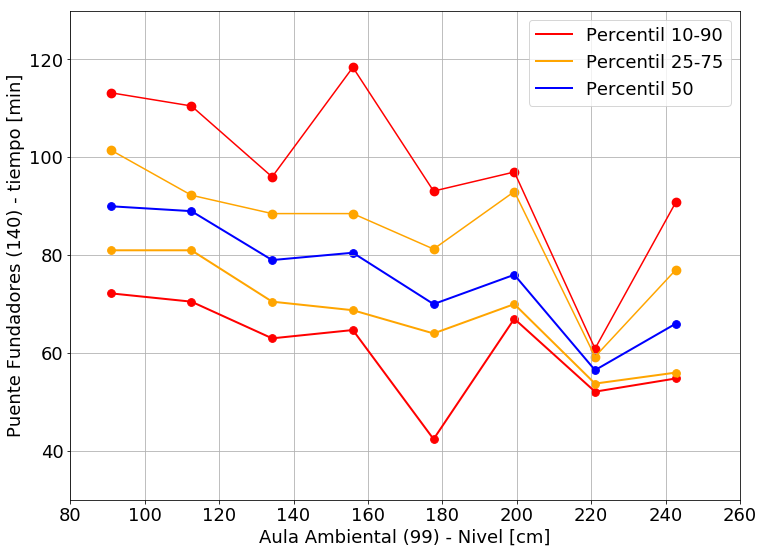

In [6]:
from matplotlib import cm
import matplotlib.colors as mcolors

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('red'), 0.25, c('green'), 0.66,c('blue')])

# Intervalos
clases = 10
binx = (max(nivelA)-min(nivelA))/clases
ejex = np.arange(min(nivelA),max(nivelA)+binx, binx)
P10_niv = [] ; P25_niv = [] ; P50_niv = [] ; P75_niv = [] ; P90_niv = [] ; ejexx = []
P10_ti = [] ; P25_ti = [] ; P50_ti = [] ; P75_ti = [] ; P90_ti = []

for x in np.arange(1,len(ejex),1):
    xx = np.where((np.array(nivelA) >= ejex[x-1]) & (np.array(nivelA) < ejex[x]))[0]

    if len(xx) > 1:
        P10_niv.append(np.percentile(np.array(nivelB)[xx],10))
        P25_niv.append(np.percentile(np.array(nivelB)[xx],25))
        P50_niv.append(np.percentile(np.array(nivelB)[xx],50))
        P75_niv.append(np.percentile(np.array(nivelB)[xx],75))
        P90_niv.append(np.percentile(np.array(nivelB)[xx],90))
        ejexx.append((ejex[x-1]+ejex[x])/2)
        
        P10_ti.append(np.percentile(np.array(lag)[xx],10))
        P25_ti.append(np.percentile(np.array(lag)[xx],25))
        P50_ti.append(np.percentile(np.array(lag)[xx],50))
        P75_ti.append(np.percentile(np.array(lag)[xx],75))
        P90_ti.append(np.percentile(np.array(lag)[xx],90))

reglas_transito = {}
reglas_transito['ejes'] = ejexx ; reglas_transito['P10_niv'] = P10_niv
reglas_transito['P25_niv'] = P25_niv ; reglas_transito['P50_niv'] = P50_niv
reglas_transito['P75_niv'] = P75_niv ; reglas_transito['P90_niv'] = P90_niv

reglas_transito['P10_ti'] = P10_ti ; reglas_transito['P25_ti'] = P25_ti
reglas_transito['P50_ti'] = P50_ti ; reglas_transito['P75_ti'] = P75_ti
reglas_transito['P90_ti'] = P90_ti

f=open('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/Transito/reglas_'+str(estA)+'-'+str(estB)+'.bin','w')
cPickle.dump(reglas_transito,f)
f.close()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P10_niv, color='r',label='Percentil 10-90')
plt.scatter(ejexx, P25_niv, color='orange',s=60)
plt.plot(ejexx, P25_niv, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_niv, color='b',s=60)
plt.plot(ejexx, P50_niv, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_niv, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_niv, color='orange')
plt.scatter(ejexx, P90_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P90_niv, color='r')
plt.xlim(80,260)
plt.ylim(250,550)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - Nivel [cm]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_ti, color='r',s=60)
plt.plot(ejexx, P10_ti, color='r',label='Percentil 10-90',lw=2)
plt.scatter(ejexx, P25_ti, color='orange',s=60)
plt.plot(ejexx, P25_ti, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_ti, color='b',s=60)
plt.plot(ejexx, P50_ti, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_ti, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_ti, color='orange')
plt.scatter(ejexx, P90_ti, color='r',s=60,lw=2)
plt.plot(ejexx, P90_ti, color='r')
plt.xlim(80,260)
plt.ylim(30,130)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - tiempo [min]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

## Reglas transito : 93 (Puente La 33) - 99 (Aula Ambiental)

In [7]:
estA = 93 ; strA = 'Puente La 33 (93)'
estB = 99 ; strB = 'Aula Ambiental (99)'

nivA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estA)+'.txt',dtype=float)
nivB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estB)+'.txt',dtype=float)
fecA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estA)+'.txt',dtype=str)
fecB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estB)+'.txt',dtype=str)

In [8]:
dateA = []
dateB = []

for fa in fecA:
    dateA.append(datetime.datetime(int(fa[0].split('-')[0]), int(fa[0].split('-')[1]), int(fa[0].split('-')[2]),
                                   int(fa[1].split(':')[0]), int(fa[1].split(':')[1])))
for fb in fecB:
    dateB.append(datetime.datetime(int(fb[0].split('-')[0]), int(fb[0].split('-')[1]), int(fb[0].split('-')[2]),
                                   int(fb[1].split(':')[0]), int(fb[1].split(':')[1])))

nivelA = [] ; nivelB = [] ; lag = []
    
for x in range(len(dateB)):
    fbb = dateB[x]
    
    for y in range(len(dateA)):
        faa = dateA[y]
        dif = str(fbb - faa).split(':')
        
        try:
            horas = int(dif[0])
            if horas <= 2:
                minutos = horas*60 + int(dif[1])
                nivelA.append(nivA[y])
                nivelB.append(nivB[x])
                lag.append(minutos)
        except:
            pass

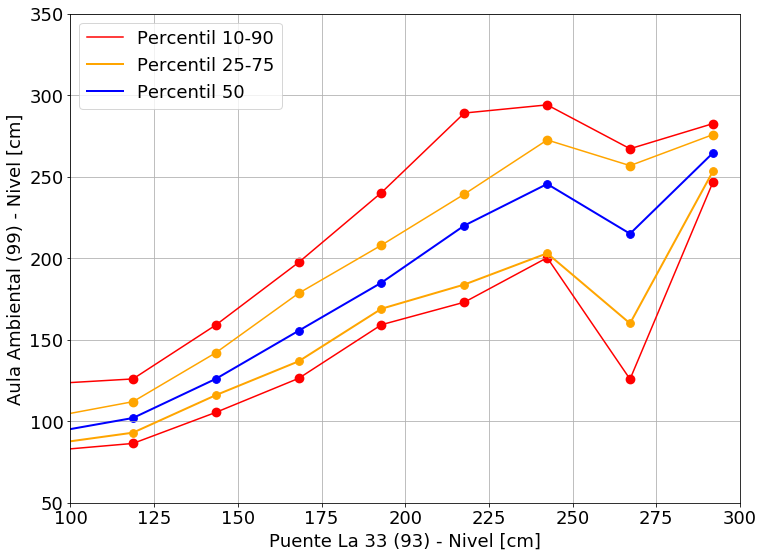

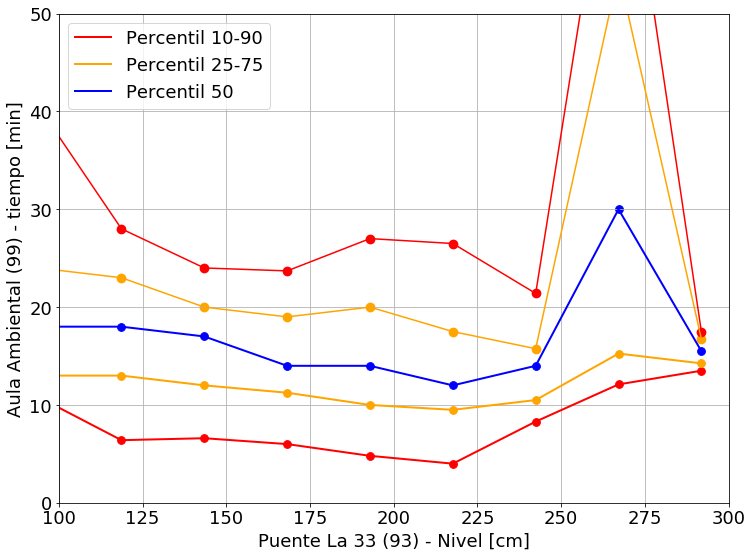

In [9]:
from matplotlib import cm
import matplotlib.colors as mcolors

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('red'), 0.25, c('green'), 0.66,c('blue')])

# Intervalos
clases = 10
binx = (max(nivelA)-min(nivelA))/clases
ejex = np.arange(min(nivelA),max(nivelA)+binx, binx)
P10_niv = [] ; P25_niv = [] ; P50_niv = [] ; P75_niv = [] ; P90_niv = [] ; ejexx = []
P10_ti = [] ; P25_ti = [] ; P50_ti = [] ; P75_ti = [] ; P90_ti = []

for x in np.arange(1,len(ejex),1):
    xx = np.where((np.array(nivelA) >= ejex[x-1]) & (np.array(nivelA) < ejex[x]))[0]

    if len(xx) > 1:
        P10_niv.append(np.percentile(np.array(nivelB)[xx],10))
        P25_niv.append(np.percentile(np.array(nivelB)[xx],25))
        P50_niv.append(np.percentile(np.array(nivelB)[xx],50))
        P75_niv.append(np.percentile(np.array(nivelB)[xx],75))
        P90_niv.append(np.percentile(np.array(nivelB)[xx],90))
        ejexx.append((ejex[x-1]+ejex[x])/2)
        
        P10_ti.append(np.percentile(np.array(lag)[xx],10))
        P25_ti.append(np.percentile(np.array(lag)[xx],25))
        P50_ti.append(np.percentile(np.array(lag)[xx],50))
        P75_ti.append(np.percentile(np.array(lag)[xx],75))
        P90_ti.append(np.percentile(np.array(lag)[xx],90))

reglas_transito = {}
reglas_transito['ejes'] = ejexx ; reglas_transito['P10_niv'] = P10_niv
reglas_transito['P25_niv'] = P25_niv ; reglas_transito['P50_niv'] = P50_niv
reglas_transito['P75_niv'] = P75_niv ; reglas_transito['P90_niv'] = P90_niv

reglas_transito['P10_ti'] = P10_ti ; reglas_transito['P25_ti'] = P25_ti
reglas_transito['P50_ti'] = P50_ti ; reglas_transito['P75_ti'] = P75_ti
reglas_transito['P90_ti'] = P90_ti

f=open('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/Transito/reglas_'+str(estA)+'-'+str(estB)+'.bin','w')
cPickle.dump(reglas_transito,f)
f.close()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P10_niv, color='r',label='Percentil 10-90')
plt.scatter(ejexx, P25_niv, color='orange',s=60)
plt.plot(ejexx, P25_niv, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_niv, color='b',s=60)
plt.plot(ejexx, P50_niv, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_niv, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_niv, color='orange')
plt.scatter(ejexx, P90_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P90_niv, color='r')
plt.xlim(100,300)
plt.ylim(50,350)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - Nivel [cm]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_ti, color='r',s=60)
plt.plot(ejexx, P10_ti, color='r',label='Percentil 10-90',lw=2)
plt.scatter(ejexx, P25_ti, color='orange',s=60)
plt.plot(ejexx, P25_ti, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_ti, color='b',s=60)
plt.plot(ejexx, P50_ti, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_ti, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_ti, color='orange')
plt.scatter(ejexx, P90_ti, color='r',s=60,lw=2)
plt.plot(ejexx, P90_ti, color='r')
plt.xlim(100,300)
plt.ylim(0,50)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - tiempo [min]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

## Reglas transito : 94 (Aguacatala) - 93 (Puente La 33)

In [11]:
estA = 94 ; strA = 'Aguacatala (94)'
estB = 93 ; strB = 'Puente La 33 (93)'

nivA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estA)+'.txt',dtype=float)
nivB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estB)+'.txt',dtype=float)
fecA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estA)+'.txt',dtype=str)
fecB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estB)+'.txt',dtype=str)

In [12]:
dateA = []
dateB = []

for fa in fecA:
    dateA.append(datetime.datetime(int(fa[0].split('-')[0]), int(fa[0].split('-')[1]), int(fa[0].split('-')[2]),
                                   int(fa[1].split(':')[0]), int(fa[1].split(':')[1])))
for fb in fecB:
    dateB.append(datetime.datetime(int(fb[0].split('-')[0]), int(fb[0].split('-')[1]), int(fb[0].split('-')[2]),
                                   int(fb[1].split(':')[0]), int(fb[1].split(':')[1])))

nivelA = [] ; nivelB = [] ; lag = []
    
for x in range(len(dateB)):
    fbb = dateB[x]
    
    for y in range(len(dateA)):
        faa = dateA[y]
        dif = str(fbb - faa).split(':')
        
        try:
            horas = int(dif[0])
            if horas <= 2:
                minutos = horas*60 + int(dif[1])
                nivelA.append(nivA[y])
                nivelB.append(nivB[x])
                lag.append(minutos)
        except:
            pass

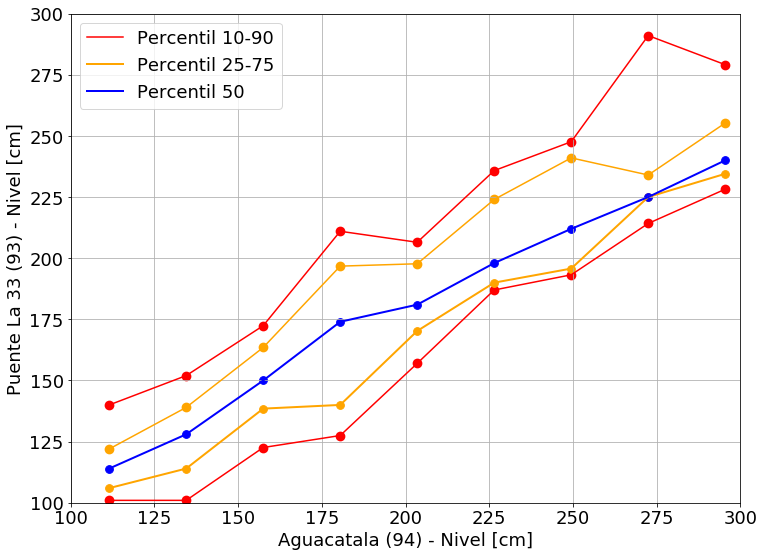

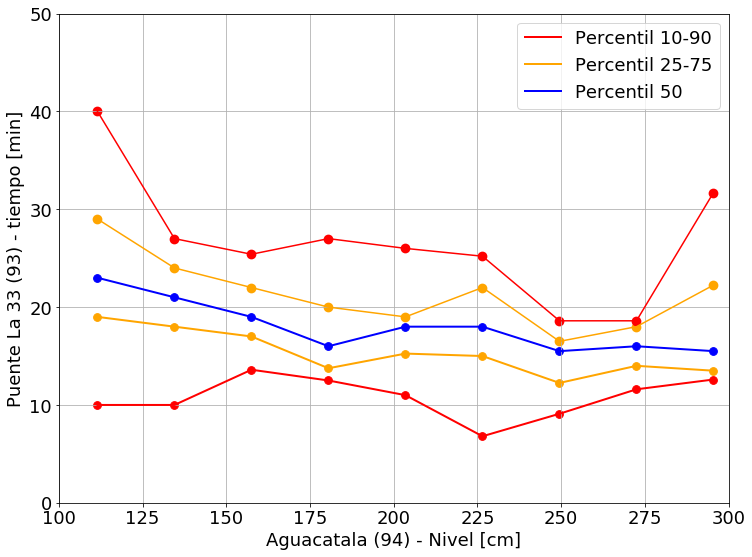

In [13]:
from matplotlib import cm
import matplotlib.colors as mcolors

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('red'), 0.25, c('green'), 0.66,c('blue')])

# Intervalos
clases = 10
binx = (max(nivelA)-min(nivelA))/clases
ejex = np.arange(min(nivelA),max(nivelA)+binx, binx)
P10_niv = [] ; P25_niv = [] ; P50_niv = [] ; P75_niv = [] ; P90_niv = [] ; ejexx = []
P10_ti = [] ; P25_ti = [] ; P50_ti = [] ; P75_ti = [] ; P90_ti = []

for x in np.arange(1,len(ejex),1):
    xx = np.where((np.array(nivelA) >= ejex[x-1]) & (np.array(nivelA) < ejex[x]))[0]

    if len(xx) > 1:
        P10_niv.append(np.percentile(np.array(nivelB)[xx],10))
        P25_niv.append(np.percentile(np.array(nivelB)[xx],25))
        P50_niv.append(np.percentile(np.array(nivelB)[xx],50))
        P75_niv.append(np.percentile(np.array(nivelB)[xx],75))
        P90_niv.append(np.percentile(np.array(nivelB)[xx],90))
        ejexx.append((ejex[x-1]+ejex[x])/2)
        
        P10_ti.append(np.percentile(np.array(lag)[xx],10))
        P25_ti.append(np.percentile(np.array(lag)[xx],25))
        P50_ti.append(np.percentile(np.array(lag)[xx],50))
        P75_ti.append(np.percentile(np.array(lag)[xx],75))
        P90_ti.append(np.percentile(np.array(lag)[xx],90))

reglas_transito = {}
reglas_transito['ejes'] = ejexx ; reglas_transito['P10_niv'] = P10_niv
reglas_transito['P25_niv'] = P25_niv ; reglas_transito['P50_niv'] = P50_niv
reglas_transito['P75_niv'] = P75_niv ; reglas_transito['P90_niv'] = P90_niv

reglas_transito['P10_ti'] = P10_ti ; reglas_transito['P25_ti'] = P25_ti
reglas_transito['P50_ti'] = P50_ti ; reglas_transito['P75_ti'] = P75_ti
reglas_transito['P90_ti'] = P90_ti

f=open('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/Transito/reglas_'+str(estA)+'-'+str(estB)+'.bin','w')
cPickle.dump(reglas_transito,f)
f.close()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P10_niv, color='r',label='Percentil 10-90')
plt.scatter(ejexx, P25_niv, color='orange',s=60)
plt.plot(ejexx, P25_niv, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_niv, color='b',s=60)
plt.plot(ejexx, P50_niv, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_niv, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_niv, color='orange')
plt.scatter(ejexx, P90_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P90_niv, color='r')
plt.xlim(100,300)
plt.ylim(100,300)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - Nivel [cm]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_ti, color='r',s=60)
plt.plot(ejexx, P10_ti, color='r',label='Percentil 10-90',lw=2)
plt.scatter(ejexx, P25_ti, color='orange',s=60)
plt.plot(ejexx, P25_ti, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_ti, color='b',s=60)
plt.plot(ejexx, P50_ti, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_ti, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_ti, color='orange')
plt.scatter(ejexx, P90_ti, color='r',s=60,lw=2)
plt.plot(ejexx, P90_ti, color='r')
plt.xlim(100,300)
plt.ylim(0,50)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - tiempo [min]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

## Reglas transito : 91 (Estacion Sabaneta) - 94 (Aguacatala)

In [14]:
estA = 91 ; strA = 'Estacion Sabaneta (91)'
estB = 94 ; strB = 'Aguacatala (94)'

nivA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estA)+'.txt',dtype=float)
nivB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estB)+'.txt',dtype=float)
fecA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estA)+'.txt',dtype=str)
fecB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estB)+'.txt',dtype=str)

In [15]:
dateA = []
dateB = []

for fa in fecA:
    dateA.append(datetime.datetime(int(fa[0].split('-')[0]), int(fa[0].split('-')[1]), int(fa[0].split('-')[2]),
                                   int(fa[1].split(':')[0]), int(fa[1].split(':')[1])))
for fb in fecB:
    dateB.append(datetime.datetime(int(fb[0].split('-')[0]), int(fb[0].split('-')[1]), int(fb[0].split('-')[2]),
                                   int(fb[1].split(':')[0]), int(fb[1].split(':')[1])))

nivelA = [] ; nivelB = [] ; lag = []
    
for x in range(len(dateB)):
    fbb = dateB[x]
    
    for y in range(len(dateA)):
        faa = dateA[y]
        dif = str(fbb - faa).split(':')
        
        try:
            horas = int(dif[0])
            if horas <= 2:
                minutos = horas*60 + int(dif[1])
                nivelA.append(nivA[y])
                nivelB.append(nivB[x])
                lag.append(minutos)
        except:
            pass

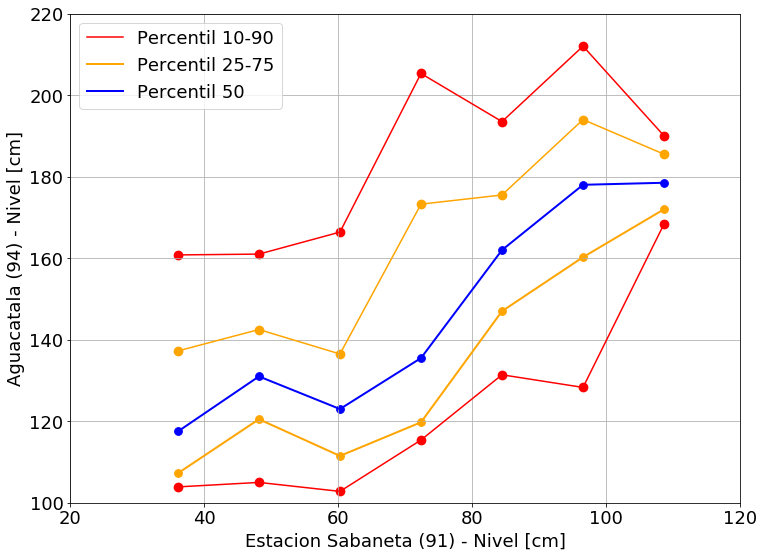

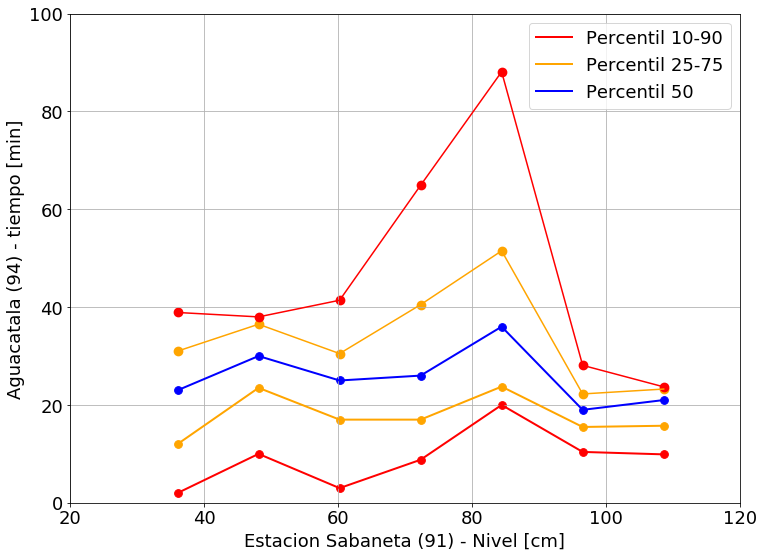

In [16]:
from matplotlib import cm
import matplotlib.colors as mcolors

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('red'), 0.25, c('green'), 0.66,c('blue')])

# Intervalos
clases = 10
binx = (max(nivelA)-min(nivelA))/clases
ejex = np.arange(min(nivelA),max(nivelA)+binx, binx)
P10_niv = [] ; P25_niv = [] ; P50_niv = [] ; P75_niv = [] ; P90_niv = [] ; ejexx = []
P10_ti = [] ; P25_ti = [] ; P50_ti = [] ; P75_ti = [] ; P90_ti = []

for x in np.arange(1,len(ejex),1):
    xx = np.where((np.array(nivelA) >= ejex[x-1]) & (np.array(nivelA) < ejex[x]))[0]

    if len(xx) > 1:
        P10_niv.append(np.percentile(np.array(nivelB)[xx],10))
        P25_niv.append(np.percentile(np.array(nivelB)[xx],25))
        P50_niv.append(np.percentile(np.array(nivelB)[xx],50))
        P75_niv.append(np.percentile(np.array(nivelB)[xx],75))
        P90_niv.append(np.percentile(np.array(nivelB)[xx],90))
        ejexx.append((ejex[x-1]+ejex[x])/2)
        
        P10_ti.append(np.percentile(np.array(lag)[xx],10))
        P25_ti.append(np.percentile(np.array(lag)[xx],25))
        P50_ti.append(np.percentile(np.array(lag)[xx],50))
        P75_ti.append(np.percentile(np.array(lag)[xx],75))
        P90_ti.append(np.percentile(np.array(lag)[xx],90))

reglas_transito = {}
reglas_transito['ejes'] = ejexx ; reglas_transito['P10_niv'] = P10_niv
reglas_transito['P25_niv'] = P25_niv ; reglas_transito['P50_niv'] = P50_niv
reglas_transito['P75_niv'] = P75_niv ; reglas_transito['P90_niv'] = P90_niv

reglas_transito['P10_ti'] = P10_ti ; reglas_transito['P25_ti'] = P25_ti
reglas_transito['P50_ti'] = P50_ti ; reglas_transito['P75_ti'] = P75_ti
reglas_transito['P90_ti'] = P90_ti

f=open('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/Transito/reglas_'+str(estA)+'-'+str(estB)+'.bin','w')
cPickle.dump(reglas_transito,f)
f.close()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P10_niv, color='r',label='Percentil 10-90')
plt.scatter(ejexx, P25_niv, color='orange',s=60)
plt.plot(ejexx, P25_niv, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_niv, color='b',s=60)
plt.plot(ejexx, P50_niv, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_niv, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_niv, color='orange')
plt.scatter(ejexx, P90_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P90_niv, color='r')
plt.xlim(20,120)
plt.ylim(100,220)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - Nivel [cm]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_ti, color='r',s=60)
plt.plot(ejexx, P10_ti, color='r',label='Percentil 10-90',lw=2)
plt.scatter(ejexx, P25_ti, color='orange',s=60)
plt.plot(ejexx, P25_ti, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_ti, color='b',s=60)
plt.plot(ejexx, P50_ti, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_ti, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_ti, color='orange')
plt.scatter(ejexx, P90_ti, color='r',s=60,lw=2)
plt.plot(ejexx, P90_ti, color='r')
plt.xlim(20,120)
plt.ylim(0,100)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - tiempo [min]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

## Reglas transito : 106 (Tres Aguas) - 91 (Estacion Sabaneta)

In [17]:
estA = 106 ; strA = 'Tres Aguas (106)'
estB = 91 ; strB = 'Estacion Sabaneta (91)'

nivA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estA)+'.txt',dtype=float)
nivB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estB)+'.txt',dtype=float)
fecA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estA)+'.txt',dtype=str)
fecB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estB)+'.txt',dtype=str)

In [18]:
dateA = []
dateB = []

for fa in fecA:
    dateA.append(datetime.datetime(int(fa[0].split('-')[0]), int(fa[0].split('-')[1]), int(fa[0].split('-')[2]),
                                   int(fa[1].split(':')[0]), int(fa[1].split(':')[1])))
for fb in fecB:
    dateB.append(datetime.datetime(int(fb[0].split('-')[0]), int(fb[0].split('-')[1]), int(fb[0].split('-')[2]),
                                   int(fb[1].split(':')[0]), int(fb[1].split(':')[1])))

nivelA = [] ; nivelB = [] ; lag = []
    
for x in range(len(dateB)):
    fbb = dateB[x]
    
    for y in range(len(dateA)):
        faa = dateA[y]
        dif = str(fbb - faa).split(':')
        
        try:
            horas = int(dif[0])
            if horas <= 2:
                minutos = horas*60 + int(dif[1])
                nivelA.append(nivA[y])
                nivelB.append(nivB[x])
                lag.append(minutos)
        except:
            pass

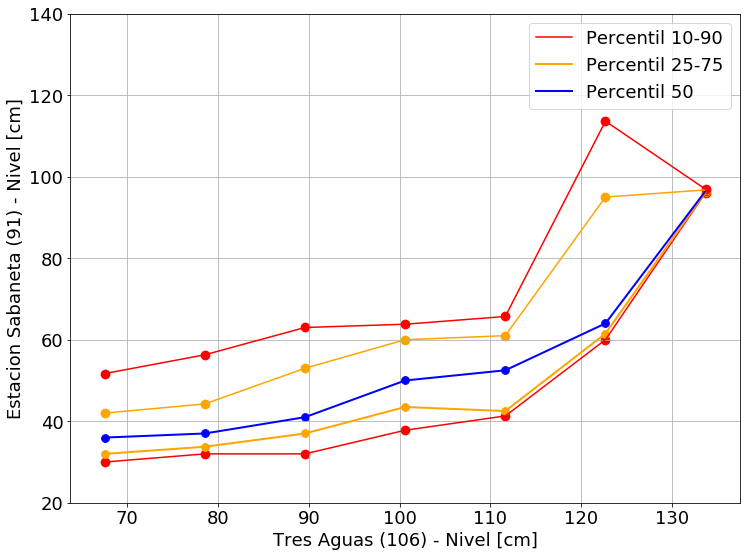

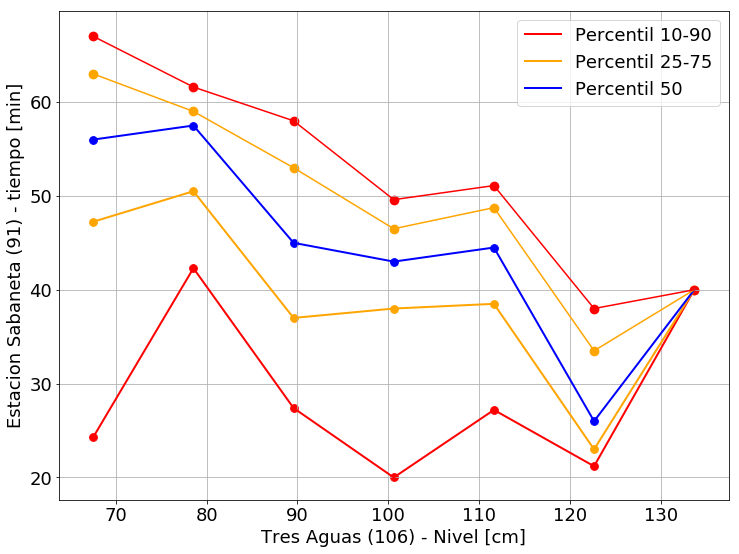

In [19]:
from matplotlib import cm
import matplotlib.colors as mcolors

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('red'), 0.25, c('green'), 0.66,c('blue')])

# Intervalos
clases = 10
binx = (max(nivelA)-min(nivelA))/clases
ejex = np.arange(min(nivelA),max(nivelA)+binx, binx)
P10_niv = [] ; P25_niv = [] ; P50_niv = [] ; P75_niv = [] ; P90_niv = [] ; ejexx = []
P10_ti = [] ; P25_ti = [] ; P50_ti = [] ; P75_ti = [] ; P90_ti = []

for x in np.arange(1,len(ejex),1):
    xx = np.where((np.array(nivelA) >= ejex[x-1]) & (np.array(nivelA) < ejex[x]))[0]

    if len(xx) > 1:
        P10_niv.append(np.percentile(np.array(nivelB)[xx],10))
        P25_niv.append(np.percentile(np.array(nivelB)[xx],25))
        P50_niv.append(np.percentile(np.array(nivelB)[xx],50))
        P75_niv.append(np.percentile(np.array(nivelB)[xx],75))
        P90_niv.append(np.percentile(np.array(nivelB)[xx],90))
        ejexx.append((ejex[x-1]+ejex[x])/2)
        
        P10_ti.append(np.percentile(np.array(lag)[xx],10))
        P25_ti.append(np.percentile(np.array(lag)[xx],25))
        P50_ti.append(np.percentile(np.array(lag)[xx],50))
        P75_ti.append(np.percentile(np.array(lag)[xx],75))
        P90_ti.append(np.percentile(np.array(lag)[xx],90))

reglas_transito = {}
reglas_transito['ejes'] = ejexx ; reglas_transito['P10_niv'] = P10_niv
reglas_transito['P25_niv'] = P25_niv ; reglas_transito['P50_niv'] = P50_niv
reglas_transito['P75_niv'] = P75_niv ; reglas_transito['P90_niv'] = P90_niv

reglas_transito['P10_ti'] = P10_ti ; reglas_transito['P25_ti'] = P25_ti
reglas_transito['P50_ti'] = P50_ti ; reglas_transito['P75_ti'] = P75_ti
reglas_transito['P90_ti'] = P90_ti

f=open('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/Transito/reglas_'+str(estA)+'-'+str(estB)+'.bin','w')
cPickle.dump(reglas_transito,f)
f.close()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P10_niv, color='r',label='Percentil 10-90')
plt.scatter(ejexx, P25_niv, color='orange',s=60)
plt.plot(ejexx, P25_niv, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_niv, color='b',s=60)
plt.plot(ejexx, P50_niv, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_niv, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_niv, color='orange')
plt.scatter(ejexx, P90_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P90_niv, color='r')
#plt.xlim(20,120)
plt.ylim(20,140)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - Nivel [cm]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_ti, color='r',s=60)
plt.plot(ejexx, P10_ti, color='r',label='Percentil 10-90',lw=2)
plt.scatter(ejexx, P25_ti, color='orange',s=60)
plt.plot(ejexx, P25_ti, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_ti, color='b',s=60)
plt.plot(ejexx, P50_ti, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_ti, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_ti, color='orange')
plt.scatter(ejexx, P90_ti, color='r',s=60,lw=2)
plt.plot(ejexx, P90_ti, color='r')
#plt.xlim(20,120)
#plt.ylim(0,100)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - tiempo [min]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

## Pruebas Afluentes

## Reglas transito : 115 (La Ayura) - 94 (Aguacatala)

In [4]:
estA = 115 ; strA = 'La Ayura (115)'
estB = 94 ; strB = 'Aguacatala (94)'

nivA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/niveles'+str(estA)+'.txt',dtype=float)
nivB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/niveles'+str(estB)+'.txt',dtype=float)
fecA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/fechas_'+str(estA)+'.txt',dtype=str)
fecB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/fechas_'+str(estB)+'.txt',dtype=str)

In [5]:
dateA = []
dateB = []

for fa in fecA:
    dateA.append(datetime.datetime(int(fa[0].split('-')[0]), int(fa[0].split('-')[1]), int(fa[0].split('-')[2]),
                                   int(fa[1].split(':')[0]), int(fa[1].split(':')[1])))
for fb in fecB:
    dateB.append(datetime.datetime(int(fb[0].split('-')[0]), int(fb[0].split('-')[1]), int(fb[0].split('-')[2]),
                                   int(fb[1].split(':')[0]), int(fb[1].split(':')[1])))

nivelA = [] ; nivelB = [] ; lag = []
    
for x in range(len(dateB)):
    fbb = dateB[x]
    
    for y in range(len(dateA)):
        faa = dateA[y]
        dif = str(fbb - faa).split(':')
        
        try:
            horas = int(dif[0])
            if horas <= 2:
                minutos = horas*60 + int(dif[1])
                nivelA.append(nivA[y])
                nivelB.append(nivB[x])
                lag.append(minutos)
        except:
            pass

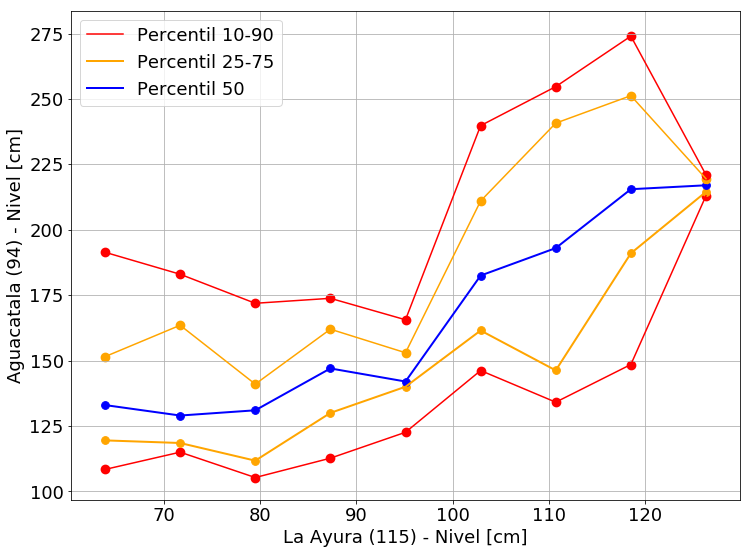

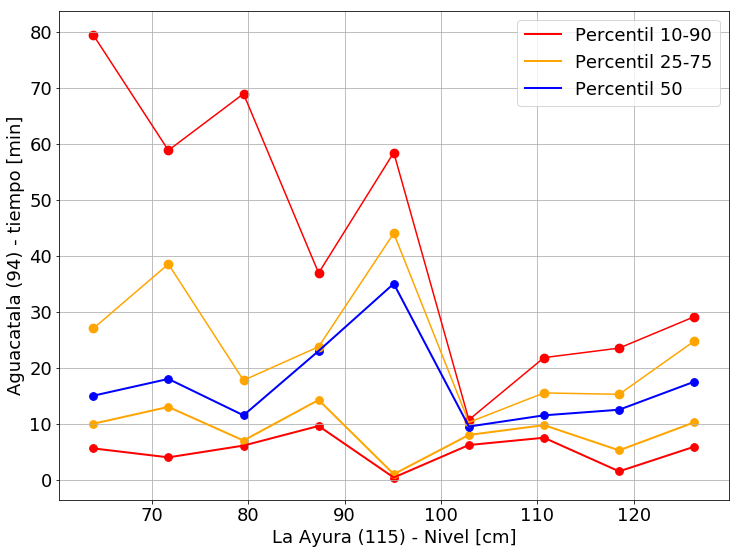

In [7]:
from matplotlib import cm
import matplotlib.colors as mcolors

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('red'), 0.25, c('green'), 0.66,c('blue')])

# Intervalos
clases = 10
binx = (max(nivelA)-min(nivelA))/clases
ejex = np.arange(min(nivelA),max(nivelA)+binx, binx)
P10_niv = [] ; P25_niv = [] ; P50_niv = [] ; P75_niv = [] ; P90_niv = [] ; ejexx = []
P10_ti = [] ; P25_ti = [] ; P50_ti = [] ; P75_ti = [] ; P90_ti = []

for x in np.arange(1,len(ejex),1):
    xx = np.where((np.array(nivelA) >= ejex[x-1]) & (np.array(nivelA) < ejex[x]))[0]

    if len(xx) > 1:
        P10_niv.append(np.percentile(np.array(nivelB)[xx],10))
        P25_niv.append(np.percentile(np.array(nivelB)[xx],25))
        P50_niv.append(np.percentile(np.array(nivelB)[xx],50))
        P75_niv.append(np.percentile(np.array(nivelB)[xx],75))
        P90_niv.append(np.percentile(np.array(nivelB)[xx],90))
        ejexx.append((ejex[x-1]+ejex[x])/2)
        
        P10_ti.append(np.percentile(np.array(lag)[xx],10))
        P25_ti.append(np.percentile(np.array(lag)[xx],25))
        P50_ti.append(np.percentile(np.array(lag)[xx],50))
        P75_ti.append(np.percentile(np.array(lag)[xx],75))
        P90_ti.append(np.percentile(np.array(lag)[xx],90))

reglas_transito = {}
reglas_transito['ejes'] = ejexx ; reglas_transito['P10_niv'] = P10_niv
reglas_transito['P25_niv'] = P25_niv ; reglas_transito['P50_niv'] = P50_niv
reglas_transito['P75_niv'] = P75_niv ; reglas_transito['P90_niv'] = P90_niv

reglas_transito['P10_ti'] = P10_ti ; reglas_transito['P25_ti'] = P25_ti
reglas_transito['P50_ti'] = P50_ti ; reglas_transito['P75_ti'] = P75_ti
reglas_transito['P90_ti'] = P90_ti

# f=open('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/Transito/reglas_'+str(estA)+'-'+str(estB)+'.bin','w')
# cPickle.dump(reglas_transito,f)
# f.close()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P10_niv, color='r',label='Percentil 10-90')
plt.scatter(ejexx, P25_niv, color='orange',s=60)
plt.plot(ejexx, P25_niv, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_niv, color='b',s=60)
plt.plot(ejexx, P50_niv, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_niv, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_niv, color='orange')
plt.scatter(ejexx, P90_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P90_niv, color='r')
#plt.xlim(20,120)
#plt.ylim(20,140)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - Nivel [cm]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_ti, color='r',s=60)
plt.plot(ejexx, P10_ti, color='r',label='Percentil 10-90',lw=2)
plt.scatter(ejexx, P25_ti, color='orange',s=60)
plt.plot(ejexx, P25_ti, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_ti, color='b',s=60)
plt.plot(ejexx, P50_ti, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_ti, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_ti, color='orange')
plt.scatter(ejexx, P90_ti, color='r',s=60,lw=2)
plt.plot(ejexx, P90_ti, color='r')
#plt.xlim(20,120)
#plt.ylim(0,100)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - tiempo [min]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

## Reglas transito : 106 (Tres Aguas) - 179 (La Inmaculada)

In [20]:
estA = 106 ; strA = 'Tres Aguas (106)'
estB = 179 ; strB = 'La Inmaculada (179)'

nivA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estA)+'.txt',dtype=float)
nivB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estB)+'.txt',dtype=float)
fecA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estA)+'.txt',dtype=str)
fecB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estB)+'.txt',dtype=str)

In [21]:
dateA = []
dateB = []

for fa in fecA:
    dateA.append(datetime.datetime(int(fa[0].split('-')[0]), int(fa[0].split('-')[1]), int(fa[0].split('-')[2]),
                                   int(fa[1].split(':')[0]), int(fa[1].split(':')[1])))
for fb in fecB:
    dateB.append(datetime.datetime(int(fb[0].split('-')[0]), int(fb[0].split('-')[1]), int(fb[0].split('-')[2]),
                                   int(fb[1].split(':')[0]), int(fb[1].split(':')[1])))

nivelA = [] ; nivelB = [] ; lag = []
    
for x in range(len(dateB)):
    fbb = dateB[x]
    
    for y in range(len(dateA)):
        faa = dateA[y]
        dif = str(fbb - faa).split(':')
        
        try:
            horas = int(dif[0])
            if horas <= 2:
                minutos = horas*60 + int(dif[1])
                nivelA.append(nivA[y])
                nivelB.append(nivB[x])
                lag.append(minutos)
        except:
            pass

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


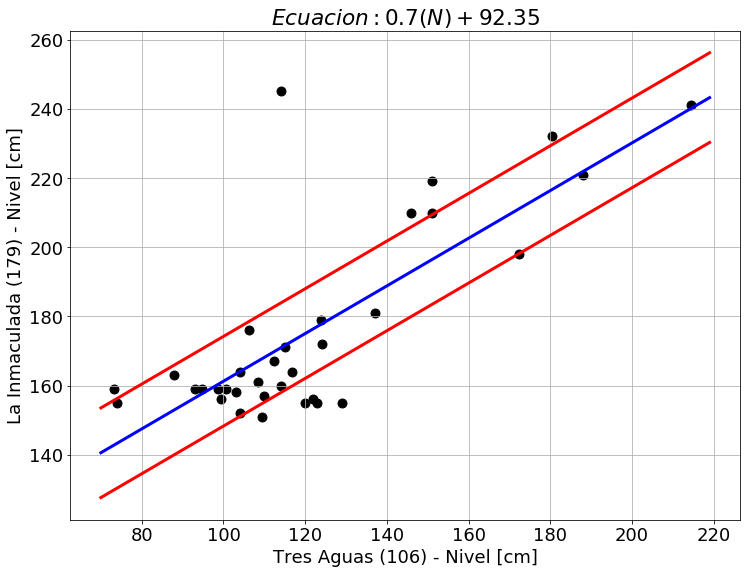

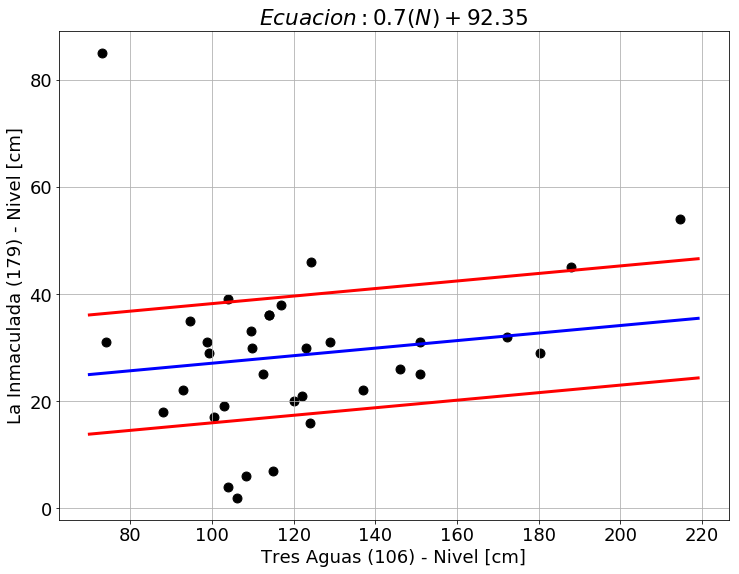

In [22]:
from matplotlib import cm
import matplotlib.colors as mcolors
import math

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('red'), 0.25, c('green'), 0.66,c('blue')])

reglas_transito = {}
ejexx = np.arange(80,230,10)
reglas_transito['ejes'] = ejexx

#--------Ecuacion de regresion para niveles------

logA = [] ; logB = []

for ll in range(len(nivelA)):
    logA.append(np.log(nivelA[ll]))
    logB.append(np.log(nivelB[ll]))

NT = np.arange(70,220,1)
z,cov = np.polyfit(nivelA,nivelB,1,cov=True)
desv = math.sqrt(cov[1][1])

reglas_transito['P10_niv'] = (ejexx*z[0]+z[1])-1*desv
reglas_transito['P25_niv'] = (ejexx*z[0]+z[1])-desv ; reglas_transito['P50_niv'] = (ejexx*z[0]+z[1])
reglas_transito['P75_niv'] = (ejexx*z[0]+z[1])+desv ; reglas_transito['P90_niv'] = (ejexx*z[0]+z[1])+1*desv

#--------Ecuacion de regresion para tiempos------

logA_ti = [] ; logB_ti = []

for ll in range(len(nivelA)):
    logA_ti.append(np.log(nivelA[ll]))
    logB_ti.append(np.log(lag[ll]))

NT = np.arange(70,220,1)
z1,cov1 = np.polyfit(nivelA,lag,1,cov=True)
desv1 = math.sqrt(cov1[1][1])

reglas_transito['P10_ti'] = (ejexx*z1[0]+z1[1])-1*desv1
reglas_transito['P25_ti'] = (ejexx*z1[0]+z1[1])-desv1 ; reglas_transito['P50_ti'] = (ejexx*z1[0]+z1[1])
reglas_transito['P75_ti'] = (ejexx*z1[0]+z1[1])+desv1 ; reglas_transito['P90_ti'] = (ejexx*z1[0]+z1[1])+1*desv1

#--------------------------------------------------

f=open('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/Transito/reglas_'+str(estA)+'-'+str(estB)+'.bin','w')
cPickle.dump(reglas_transito,f)
f.close()


plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))

plt.scatter(nivelA,nivelB,s=80,color='k')
#plt.plot(NT,math.exp(z[1])*(NT**z[0]),color='k', lw=3)
plt.plot(NT,(NT*z[0]+z[1])+desv,color='r', lw=3)
plt.plot(NT,(NT*z[0]+z[1])-desv,color='r', lw=3)
plt.plot(NT,NT*z[0]+z[1],color='b', lw=3)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - Nivel [cm]',fontsize=18)
a = "%0.1f" % (z[0])
b = "%0.2f" % (z[1])
plt.title('$Ecuacion: $'+a+'$ (N) + {'+b+'}$')
plt.legend()
plt.grid()
plt.show()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))

plt.scatter(nivelA,lag,s=80,color='k')
#plt.plot(NT,math.exp(z[1])*(NT**z[0]),color='k', lw=3)
plt.plot(NT,(NT*z1[0]+z1[1])+desv1,color='r', lw=3)
plt.plot(NT,(NT*z1[0]+z1[1])-desv1,color='r', lw=3)
plt.plot(NT,NT*z1[0]+z1[1],color='b', lw=3)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - Nivel [cm]',fontsize=18)
a = "%0.1f" % (z[0])
b = "%0.2f" % (z[1])
plt.title('$Ecuacion: $'+a+'$ (N) + {'+b+'}$')
plt.legend()
plt.grid()
plt.show()


## Reglas transito : 90 (El Encanto) - 108 (Santa Rita)

In [1]:
# El Encanto cambio de sensor el 05/07/2017

In [4]:
estA = 90 ; strA = 'El Encanto (90)'
estB = 108 ; strB = 'Santa Rita (108)'

nivA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estA)+'.txt',dtype=float)
nivB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estB)+'.txt',dtype=float)
fecA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estA)+'.txt',dtype=str)
fecB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estB)+'.txt',dtype=str)

In [5]:
dateA = []
dateB = []

for fa in fecA:
    dateA.append(datetime.datetime(int(fa[0].split('-')[0]), int(fa[0].split('-')[1]), int(fa[0].split('-')[2]),
                                   int(fa[1].split(':')[0]), int(fa[1].split(':')[1])))
for fb in fecB:
    dateB.append(datetime.datetime(int(fb[0].split('-')[0]), int(fb[0].split('-')[1]), int(fb[0].split('-')[2]),
                                   int(fb[1].split(':')[0]), int(fb[1].split(':')[1])))

nivelA = [] ; nivelB = [] ; lag = []
    
for x in range(len(dateB)):
    fbb = dateB[x]
    
    for y in range(len(dateA)):
        faa = dateA[y]
        dif = str(fbb - faa).split(':')
        
        try:
            horas = int(dif[0])
            if horas <= 2:
                minutos = horas*60 + int(dif[1])
                nivelA.append(nivA[y])
                nivelB.append(nivB[x])
                lag.append(minutos)
        except:
            pass

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


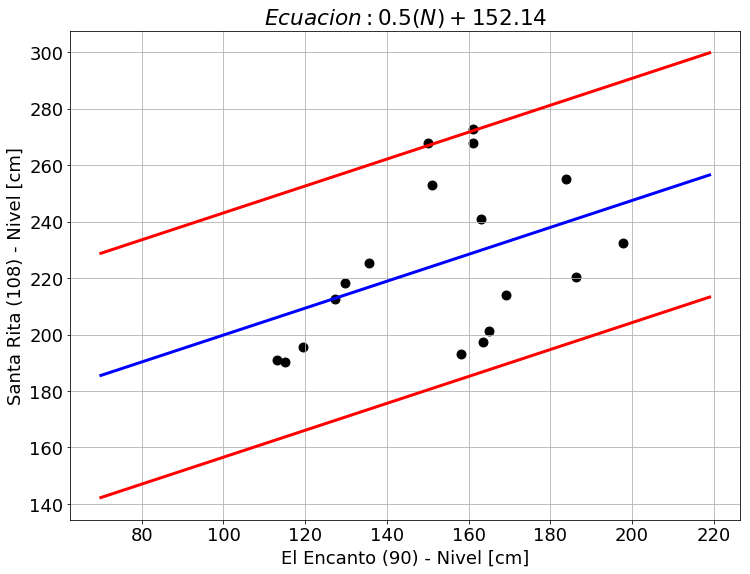

In [7]:
from matplotlib import cm
import matplotlib.colors as mcolors
import math

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('red'), 0.25, c('green'), 0.66,c('blue')])

def polyfit_with_fixed_points(n, x, y, xf, yf) :
    mat = np.empty((n + 1 + len(xf),) * 2)
    vec = np.empty((n + 1 + len(xf),))
    x_n = x**np.arange(2 * n + 1)[:, None]
    yx_n = np.sum(x_n[:n + 1] * y, axis=1)
    x_n = np.sum(x_n, axis=1)
    idx = np.arange(n + 1) + np.arange(n + 1)[:, None]
    mat[:n + 1, :n + 1] = np.take(x_n, idx)
    xf_n = xf**np.arange(n + 1)[:, None]
    mat[:n + 1, n + 1:] = xf_n / 2
    mat[n + 1:, :n + 1] = xf_n.T
    mat[n + 1:, n + 1:] = 0
    vec[:n + 1] = yx_n
    vec[n + 1:] = yf
    params = np.linalg.solve(mat, vec)
    return params[:n + 1]

# Intervalos
clases = 6
binx = (max(nivelA)-min(nivelA))/clases
ejex = np.arange(min(nivelA),max(nivelA)+binx, binx)
P10_niv = [] ; P25_niv = [] ; P50_niv = [] ; P75_niv = [] ; P90_niv = [] ; ejexx = []
P10_ti = [] ; P25_ti = [] ; P50_ti = [] ; P75_ti = [] ; P90_ti = []

for x in np.arange(1,len(ejex),1):
    xx = np.where((np.array(nivelA) >= ejex[x-1]) & (np.array(nivelA) < ejex[x]))[0]

    if len(xx) > 1:
        P10_niv.append(np.percentile(np.array(nivelB)[xx],10))
        P25_niv.append(np.percentile(np.array(nivelB)[xx],25))
        P50_niv.append(np.percentile(np.array(nivelB)[xx],50))
        P75_niv.append(np.percentile(np.array(nivelB)[xx],75))
        P90_niv.append(np.percentile(np.array(nivelB)[xx],90))
        ejexx.append((ejex[x-1]+ejex[x])/2)
        
        P10_ti.append(np.percentile(np.array(lag)[xx],10))
        P25_ti.append(np.percentile(np.array(lag)[xx],25))
        P50_ti.append(np.percentile(np.array(lag)[xx],50))
        P75_ti.append(np.percentile(np.array(lag)[xx],75))
        P90_ti.append(np.percentile(np.array(lag)[xx],90))

reglas_transito = {}
reglas_transito['ejes'] = ejexx ; reglas_transito['P10_niv'] = P10_niv
reglas_transito['P25_niv'] = P25_niv ; reglas_transito['P50_niv'] = P50_niv
reglas_transito['P75_niv'] = P75_niv ; reglas_transito['P90_niv'] = P90_niv

reglas_transito['P10_ti'] = P10_ti ; reglas_transito['P25_ti'] = P25_ti
reglas_transito['P50_ti'] = P50_ti ; reglas_transito['P75_ti'] = P75_ti
reglas_transito['P90_ti'] = P90_ti

# f=open('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/Transito/reglas_'+str(estA)+'-'+str(estB)+'.bin','w')
# cPickle.dump(reglas_transito,f)
# f.close()

logA = [] ; logB = []

for ll in range(len(nivelA)):
    logA.append(np.log(nivelA[ll]))
    logB.append(np.log(nivelB[ll]))

NT = np.arange(70,220,1)
xf = [np.log(max(nivelA))]
yf = [np.log(max(nivelB))]
#z = polyfit_with_fixed_points(1,logA,logB,xf,yf)
#z = np.polyfit(logA,logB,1)
z,cov = np.polyfit(nivelA,nivelB,1,cov=True)
#poly = np.polynomial.Polynomial(z)

desv = math.sqrt(cov[1][1])

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))

plt.scatter(nivelA,nivelB,s=80,color='k')
#plt.plot(NT,math.exp(z[1])*(NT**z[0]),color='k', lw=3)
plt.plot(NT,(NT*z[0]+z[1])+desv,color='r', lw=3)
plt.plot(NT,(NT*z[0]+z[1])-desv,color='r', lw=3)
plt.plot(NT,NT*z[0]+z[1],color='b', lw=3)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - Nivel [cm]',fontsize=18)
a = "%0.1f" % (z[0])
b = "%0.2f" % (z[1])
plt.title('$Ecuacion: $'+a+'$ (N) + {'+b+'}$')
plt.legend()
plt.grid()
plt.show()

## Reglas transito : 166 (El Chocho) - 92 (Altavista)

In [30]:
estA = 166 ; strA = 'El Chocho (166)'
estB = 92 ; strB = 'Altavista (92)'

nivA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estA)+'.txt',dtype=float)
nivB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/niveles'+str(estB)+'.txt',dtype=float)
fecA = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estA)+'.txt',dtype=str)
fecB = np.genfromtxt('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/files/fechas'+str(estB)+'.txt',dtype=str)

In [31]:
dateA = []
dateB = []

for fa in fecA:
    dateA.append(datetime.datetime(int(fa[0].split('-')[0]), int(fa[0].split('-')[1]), int(fa[0].split('-')[2]),
                                   int(fa[1].split(':')[0]), int(fa[1].split(':')[1])))
for fb in fecB:
    dateB.append(datetime.datetime(int(fb[0].split('-')[0]), int(fb[0].split('-')[1]), int(fb[0].split('-')[2]),
                                   int(fb[1].split(':')[0]), int(fb[1].split(':')[1])))

nivelA = [] ; nivelB = [] ; lag = []
    
for x in range(len(dateB)):
    fbb = dateB[x]
    
    for y in range(len(dateA)):
        faa = dateA[y]
        dif = str(fbb - faa).split(':')
        
        try:
            horas = int(dif[0])
            if horas <= 2:
                minutos = horas*60 + int(dif[1])
                nivelA.append(nivA[y])
                nivelB.append(nivB[x])
                lag.append(minutos)
        except:
            pass

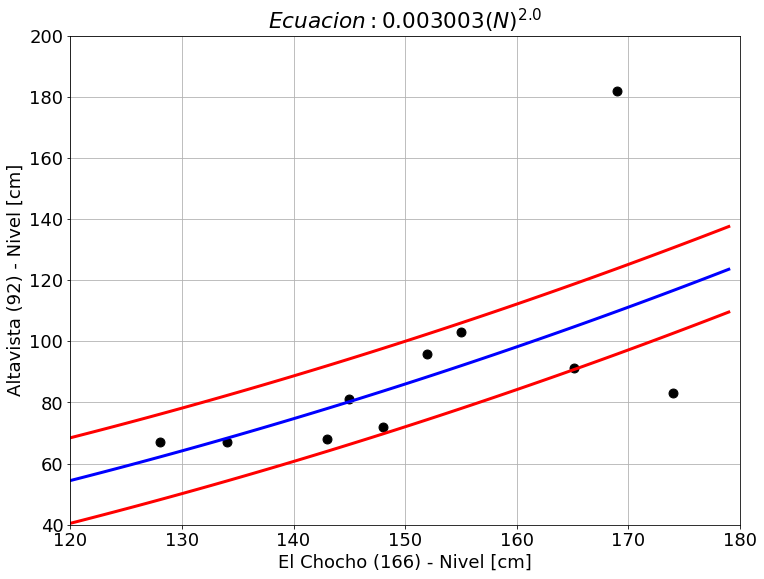

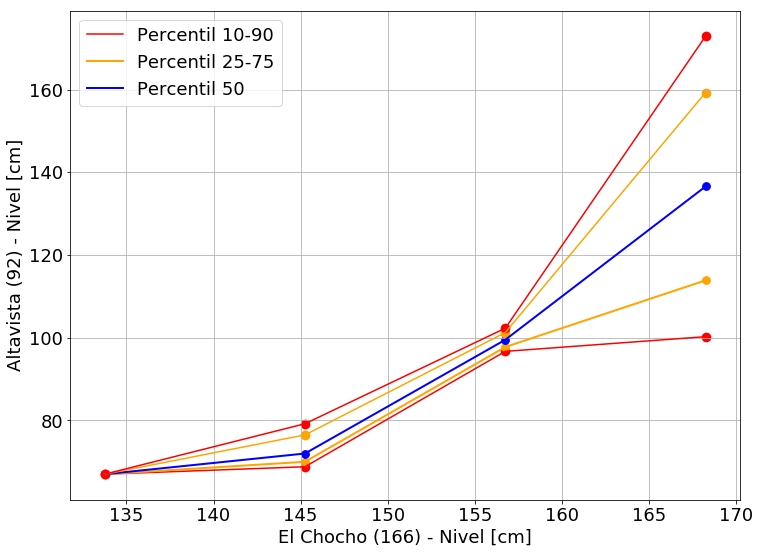

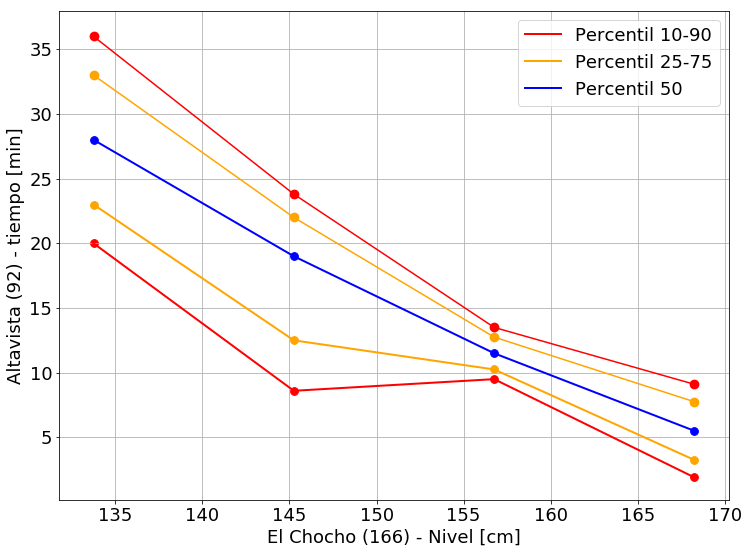

In [32]:
from matplotlib import cm
import matplotlib.colors as mcolors
import math

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('red'), 0.25, c('green'), 0.66,c('blue')])

def polyfit_with_fixed_points(n, x, y, xf, yf) :
    mat = np.empty((n + 1 + len(xf),) * 2)
    vec = np.empty((n + 1 + len(xf),))
    x_n = x**np.arange(2 * n + 1)[:, None]
    yx_n = np.sum(x_n[:n + 1] * y, axis=1)
    x_n = np.sum(x_n, axis=1)
    idx = np.arange(n + 1) + np.arange(n + 1)[:, None]
    mat[:n + 1, :n + 1] = np.take(x_n, idx)
    xf_n = xf**np.arange(n + 1)[:, None]
    mat[:n + 1, n + 1:] = xf_n / 2
    mat[n + 1:, :n + 1] = xf_n.T
    mat[n + 1:, n + 1:] = 0
    vec[:n + 1] = yx_n
    vec[n + 1:] = yf
    params = np.linalg.solve(mat, vec)
    return params[:n + 1]

# Intervalos
clases = 4
binx = (max(nivelA)-min(nivelA))/clases
ejex = np.arange(min(nivelA),max(nivelA)+binx, binx)
P10_niv = [] ; P25_niv = [] ; P50_niv = [] ; P75_niv = [] ; P90_niv = [] ; ejexx = []
P10_ti = [] ; P25_ti = [] ; P50_ti = [] ; P75_ti = [] ; P90_ti = []

for x in np.arange(1,len(ejex),1):
    xx = np.where((np.array(nivelA) >= ejex[x-1]) & (np.array(nivelA) < ejex[x]))[0]

    if len(xx) > 1:
        P10_niv.append(np.percentile(np.array(nivelB)[xx],10))
        P25_niv.append(np.percentile(np.array(nivelB)[xx],25))
        P50_niv.append(np.percentile(np.array(nivelB)[xx],50))
        P75_niv.append(np.percentile(np.array(nivelB)[xx],75))
        P90_niv.append(np.percentile(np.array(nivelB)[xx],90))
        ejexx.append((ejex[x-1]+ejex[x])/2)
        
        P10_ti.append(np.percentile(np.array(lag)[xx],10))
        P25_ti.append(np.percentile(np.array(lag)[xx],25))
        P50_ti.append(np.percentile(np.array(lag)[xx],50))
        P75_ti.append(np.percentile(np.array(lag)[xx],75))
        P90_ti.append(np.percentile(np.array(lag)[xx],90))

reglas_transito = {}
reglas_transito['ejes'] = ejexx ; reglas_transito['P10_niv'] = P10_niv
reglas_transito['P25_niv'] = P25_niv ; reglas_transito['P50_niv'] = P50_niv
reglas_transito['P75_niv'] = P75_niv ; reglas_transito['P90_niv'] = P90_niv

reglas_transito['P10_ti'] = P10_ti ; reglas_transito['P25_ti'] = P25_ti
reglas_transito['P50_ti'] = P50_ti ; reglas_transito['P75_ti'] = P75_ti
reglas_transito['P90_ti'] = P90_ti

# f=open('/media/nicolas/Home/Jupyter/Esneider/modelo_crecidas/Transito/reglas_'+str(estA)+'-'+str(estB)+'.bin','w')
# cPickle.dump(reglas_transito,f)
# f.close()

logA = [] ; logB = []

for ll in range(len(nivelA)):
    logA.append(np.log(nivelA[ll]))
    logB.append(np.log(nivelB[ll]))

NT = np.arange(120,180,1)
xf = [np.log(max(nivelA))]
yf = [np.log(max(nivelB))]
#z = polyfit_with_fixed_points(1,logA,logB,xf,yf)
#z = np.polyfit(logA,logB,1)
z,cov = np.polyfit(logA,logB,1,cov=True)
#poly = np.polynomial.Polynomial(z)

desv = math.sqrt(cov[1][1])

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(nivelA,nivelB,s=80,color='k')
plt.plot(NT,math.exp(z[1])*(NT**z[0]),color='b', lw=3)
plt.plot(NT,(math.exp(z[1])*(NT**z[0]))+3*desv,color='r', lw=3)
plt.plot(NT,(math.exp(z[1])*(NT**z[0]))-3*desv,color='r', lw=3)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - Nivel [cm]',fontsize=18)
a = "%0.1f" % (z[0])
b = "%0.6f" % math.exp(z[1])
plt.title('$Ecuacion: $'+b+'$ (N)^{'+a+'}$')
plt.xlim(120,180)
plt.ylim(40,200)
plt.legend()
plt.grid()
plt.show()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P10_niv, color='r',label='Percentil 10-90')
plt.scatter(ejexx, P25_niv, color='orange',s=60)
plt.plot(ejexx, P25_niv, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_niv, color='b',s=60)
plt.plot(ejexx, P50_niv, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_niv, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_niv, color='orange')
plt.scatter(ejexx, P90_niv, color='r',s=60,lw=2)
plt.plot(ejexx, P90_niv, color='r')
#plt.xlim(20,120)
#plt.ylim(20,140)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - Nivel [cm]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

plt.close('all')
matplotlib.rcParams.update({'font.size': 18})
fig=pl.figure(facecolor='w',edgecolor='w',figsize=(12,9))
plt.scatter(ejexx, P10_ti, color='r',s=60)
plt.plot(ejexx, P10_ti, color='r',label='Percentil 10-90',lw=2)
plt.scatter(ejexx, P25_ti, color='orange',s=60)
plt.plot(ejexx, P25_ti, color='orange',label='Percentil 25-75',lw=2)
plt.scatter(ejexx, P50_ti, color='b',s=60)
plt.plot(ejexx, P50_ti, color='b',label='Percentil 50',lw=2)
plt.scatter(ejexx, P75_ti, color='orange',s=60,lw=2)
plt.plot(ejexx, P75_ti, color='orange')
plt.scatter(ejexx, P90_ti, color='r',s=60,lw=2)
plt.plot(ejexx, P90_ti, color='r')
#plt.xlim(20,120)
#plt.ylim(0,100)
plt.xlabel(strA+' - Nivel [cm]',fontsize=18)
plt.ylabel(strB+' - tiempo [min]',fontsize=18)
plt.legend()
plt.grid()
plt.show()

In [32]:
desv

113.01204360992666